# Problem

In this challenge, we are asked to **predict whether a passenger on the titanic would survive or not.**

# Strategy

1. In order to determine this, figure out which passengers survived and see what they had in common.
2. Common features will help with intial feature engineering.
3. Use this to build prediction model using L.R, Random Forest, Gradient Boost, Decision Tree?. 

## Load necessary Libraries/Pkg's

In [1]:
#For linear algebra
import numpy as np

#For dataframe/data processing
import pandas as pd

#Data Viz
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#M.L. Algorithms 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Load Data

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Here is a short description of the features:

PassengerId: Unique ID of a passenger
Survived: Survival
Pclass: Ticket class
Name: Full name
Sex: Gender
Age: How old in years
SibSp: # of Siblings / # of Spouses abroad the Titanic
Parch: # of Parents / # of Children abroad the Titanic
Ticket: Ticket Number
Fare: Passenger Fare
Cabin: Cabin number
Embarked: Port of Embarkation

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that the training set here has **891** examples and **11** features including the target variable **Survived**.

Also, there are 38.38% passengers who survived. The age ranges from 0.4 to 80.

There is some data that will need to be **convered to numerical values** in order to properly train models.

On top of this, the **range in values between features vary immensely**. This will need to be addressed through scaling and normalization.

Lastly, for some of the features, it is clear that there is **some missing data**, which will be addressed.

Let us start with dealing with the missing data.

1. Figure out sum (added up values) of null values there are.
2. Figure out count (how many) of null values.
3. Round out percentages and Sort these values.
4. Present this in Pandas DF and show top 5. 

In [7]:
# total = train.isnull().sum().sort_values(ascending=False)
# percent_1 = train.isnull().sum()/train.isnull().count()*100
# percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
# missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
# missing_data.head(5)

When table gets debugged...

The Embarked feature only has 2 missing values, which can easily deal with a fill-in. It will be more work to deal with Age feature which has significantly a lot more missing values (177). The Cabin feature has a huge amount of missing values (77.1%). It may be wise to drop this feature considering how much data is missing. 

As we consider which features are relevant/have most contribution to target variable (survival), need to explore correlation between multiple features and survival. Some experimentation will follow.

### 1. Age and Sex

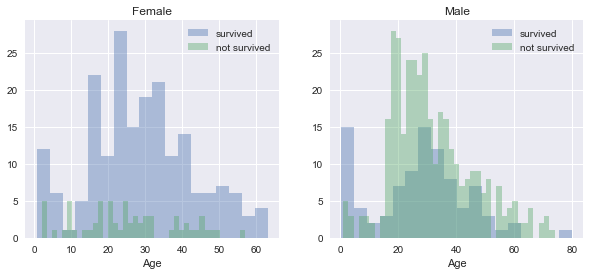

In [8]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

We can tell from the graphs that a lot more females survived relative to males.

Also, there is a high amount of survival for men if they are between the age of 18 and 30 and if they are infants.
For women, the high survival rate is between ages 14 and 40 and for infants as well. So for both men and women, infants have high survival. 

Probability of low survival for men is between the ages of 5 and 18, but this is not the case for women. Based on the graph and data, low survival is pretty much at each age except for between age 50 to 60.

Due to **age being a factor in survival** and wanting each feature to be on the same scale, age groups will be made.

### 2. Embarked, Pclass and Sex

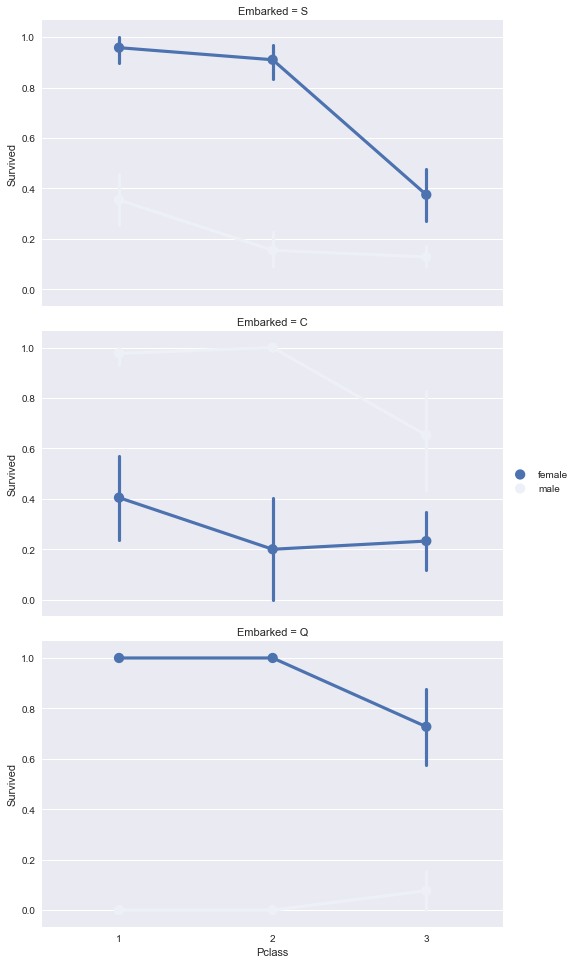

In [9]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Embarked does seem to be correlated with survival depending on whether or not you are male or female.

There is a high survival rate for females who come from Port S and Port Q. There is a low survival rate for females who come from Port C. The inverse is true for males.

There does seem to be a correlation between survival and Pclass. Another plot of this follows. 

### 3. Pclass

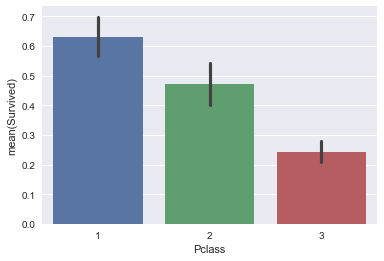

In [10]:
sns.barplot(x='Pclass', y='Survived', data=train)

Here we see more clearly that Pclass does contribute to survival, especially if you are from Pclass 1. 

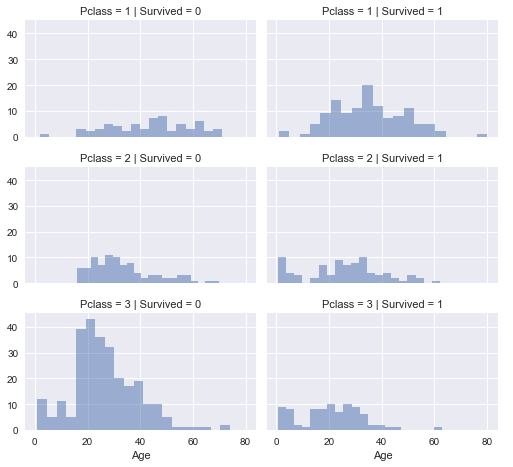

In [11]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

These graphs show survival versus not surviving for each class. And this confirms that those from Pclass 1 did have a high survival rate.
Also, we can see that Pclass 3 had a low survival rate.

### 4. SibSp and Parch

Due to these features being connected by relationship, it would make sense that these features are combined since they would show the total number of relatives a passenger had on the Titanic. Also, I will show if someone is not alone.   

In [12]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0 #These numbers seem to be flipped
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1 #Need to ask about this
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [13]:
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

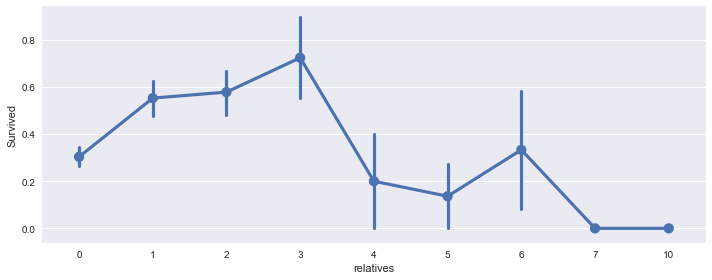

In [14]:
axes = sns.factorplot('relatives','Survived', 
                      data=train, aspect = 2.5, )

We can tell here that those who had 1-3 relatives had higher survival rate versus those who had no relatives or greater than 4 relatives (except those who had 6 relatives).

## Data Processing

First thing that will be done is to drop any features that do not directly contribute to high survival rate starting with "PassengerId". This will be done on the training set alone since the test set does not need to have this feature dropped.

In [15]:
train = train.drop(['PassengerId'], axis = 1)

### Missing Data

As a reminder, we need to deal with these features that have missing data: Cabin (687), Age (177) and Embarked (2).

Initial thoughts were to delete the Cabin variable given that it had such a high percentage of missing values. However, with further research, it was discovered that a cabin number such as, C123, actually meant a certain deck. 

And this could be a contributor to higher survival rate. Therefore, this information will be made into a new feature with a numerical variable. And rows that do not have this feature filled in will be replaced with 0 value.

In [16]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 

We can now drop the Cabin feature. This was already done with the train dataset, but not the test dataset. So the test dataset will be modified.

In [17]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

### Age:

Now we can tackle the issue with the age features missing values. 

An array will be created that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [18]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)

In [19]:
#Check for any existing null's

train["Age"].isnull().sum()

0

### Embarked:

Since Embarked feature has only 2 missing values, the empty spaces will be filled with the most common value.

In [20]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

The most frequent value is 'S'. So the two empty spaces will be filled with 'S'.

In [21]:
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

## Converting Features (Scaling and Normalization)

In [22]:
train.info() #This helps check that all missing values were taken care of. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int64
Deck         891 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


Above, you can see that 'Fare' feature is a Float. Also, there are four categorical features ('Name', 'Sex', 'Ticket' and 'Embarked') that we need to deal with. This will be accomplished one after another. 

### Fare:

In [23]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

### Name:

We will extract Titles from the existing Name feature to build a new feature out of that.

In [24]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [25]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### Sex:

Need to convert Sex feature into numerical one.

In [26]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset["Sex"].map(genders)

### Ticket:

Is it worth keeping "Ticket" feature?

Let's take a look at how its values break down more closely.

In [27]:
train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

Due to this feature having 681 unique features, it is tricky to convert all these values into useful categories. Therefore, this feature will be dropped from the dataset.

In [28]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

### Embarked:

Converting "Embarked" feature into numeric one.

In [29]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].map(ports)

## Creating Categories

Now we will create categories with the following features:

### Age

In [30]:
data  = [train, test]
for dataset in data:
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [31]:
#Checking out Age's new categories' breakdown:
train['Age'].value_counts()

6    165
4    164
5    145
3    134
2    116
1     99
0     68
Name: Age, dtype: int64

### Fare

We can do the same breakdown with the "Fare" feature as we did with the "Age" feature, but this one is somewhat tricky. If there are a few categories made, 80% of the values will be in one category. To help distribute the values more evenly, we can see where to cut each category using sklearn's "qcut()" function. 

In [32]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,4,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [33]:
#Need to supply code that determined where cut off pts for Fare values 

In [34]:
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

# Creating New Features

Two new features will be created out of already existing ones that have been determined as contributor to survival. 

These new combinations will help calculate high survival rate or not. 

### 1. Age times Class

In [35]:
data = [train, test]

for dataset in data:
    dataset["Age_Class"] = dataset['Age'] * dataset['Pclass']

### 2. Fare per Person

In [36]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare'] / (dataset['relatives'] + 1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [37]:
#Last look at training set before we feed it into our models.

train.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,4,0,0,1,2,0,1,8,1,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


# Building Machine Learning Models

In [43]:
X_train = train.drop("Survived", axis = 1)
Y_train = train["Survived"]
X_test = test.drop("PassengerId", axis = 1).copy()  

###Original test dataset DOES NOT have 'Survived' feature/target value

#What about Y_test?

In [44]:
test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,892,3,0,2,0,0,0,2,0,1,8,1,6,0
1,893,3,1,5,1,0,0,0,1,0,8,3,15,0
2,894,2,0,3,0,0,1,2,0,1,8,1,6,1
3,895,3,0,5,0,0,1,0,0,1,8,1,15,1
4,896,3,1,5,1,1,1,0,2,0,8,3,15,0


In [45]:
# Stochastic Gradient Descent (SGD) Learning

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")

(79.01, '%')


In [46]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

(92.82, '%')


In [47]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

(81.59, '%')


In [48]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

(86.76, '%')


In [49]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

(77.44, '%')


In [50]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

(81.37, '%')


In [51]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

(80.92, '%')


In [52]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

(92.82, '%')


## Which is the best model out all that were ran?

In [53]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.82,Random Forest
92.82,Decision Tree
86.76,KNN
81.59,Logistic Regression
81.37,Perceptron
80.92,Support Vector Machines
79.01,Stochastic Gradient Decent
77.44,Naive Bayes


Random Forest got 1st place.

Let us still check how Random Forest performs after cross-validation is done on data.

## K-Fold Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(rf, X_train, Y_train, cv = 10, scoring = "accuracy")

In [55]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation", scores.std())

('Scores:', array([0.8       , 0.84444444, 0.75280899, 0.84269663, 0.88764045,
       0.86516854, 0.84269663, 0.76404494, 0.84269663, 0.84090909]))
('Mean:', 0.82831063443423)
('Standard Deviation', 0.040682297232131966)


These results look more realistic since the mean (86.52%) is not as high as the original 92.82% value. 

The standard deviation is around .04, which shows how precise the estimates are.

This means that our accuracy can differ with -/+ 4%.

Accuracy is pretty high and Random Forest is easy to use. Therefore, we will try to further increase its performance.

## RANDOM FOREST

What is it exactly?

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

One big advantage of random forest is, that it can be used for both classification and regression problems, which form the majority of current machine learning systems. With a few exceptions a random-forest classifier has all the hyperparameters of a decision-tree classifier and also all the hyperparameters of a bagging classifier, to control the ensemble itself.

The random-forest algorithm brings extra randomness into the model, when it is growing the trees. Instead of searching for the best feature while splitting a node, it searches for the best feature among a random subset of features. This process creates a wide diversity, which generally results in a better model. Therefore when you are growing a tree in random forest, only a random subset of the features is considered for splitting a node. You can even make trees more random, by using random thresholds on top of it, for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

## Feature Importance

In [56]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [58]:
importances.head(15)

,importance
feature,
Title,0.193
Sex,0.184
Age_Class,0.090
Deck,0.086
Pclass,0.078
Age,0.077
Fare,0.067
relatives,0.062
Embarked,0.051


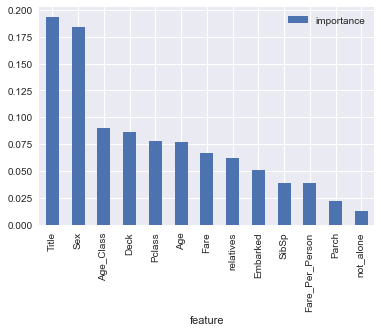

In [59]:
importances.plot.bar()